Import Data and Data Analysis

In [1]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import training Data
train_df = pd.read_csv('../credit_kaggle/GiveMeSomeCredit/cs-training.csv')

In [3]:
# Check data and column types
print(train_df.dtypes) 
train_df.head() 

Unnamed: 0                                int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Data Cleaning/Wrangling

In [4]:
# Drop Unnamed: 0 Column
train_df = train_df.drop('Unnamed: 0',axis=1)

In [5]:
# Check for NaN
print(train_df.isnull().sum())
train_df.describe()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


From the above graph, we can see that the rows with NULL data are in columns 'MonthlyIncome' and 'NumberOfDependents'.
Deleteing all the NaN data will discard about 30000 rows out of 150000 rows, which is approximately 25% of the data.
Deleting all rows with NaN may result in less accurate analysis and models.
Therefore, we will substitute the NaN values with the median

In [6]:
median_monthlyincome = train_df['MonthlyIncome'].median()
median_numofdep = train_df['NumberOfDependents'].median()
train_df['MonthlyIncome'] = train_df['MonthlyIncome'].fillna(median_monthlyincome)
train_df['NumberOfDependents'] = train_df['NumberOfDependents'].fillna(median_numofdep)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.017151,-0.029669,0.117175,-0.007038,0.102261,0.046869
RevolvingUtilizationOfUnsecuredLines,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159,-0.215693
NumberOfTime30-59DaysPastDueNotWorse,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590
DebtRatio,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476
MonthlyIncome,-0.017151,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314
NumberOfOpenCreditLinesAndLoans,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026
NumberOfTimes90DaysLate,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962
NumberRealEstateLoansOrLines,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399
NumberOfTime60-89DaysPastDueNotWorse,0.102261,-0.001048,-0.057159,0.987005,-0.007533,-0.009252,-0.071077,0.992796,-0.039722,1.000000,-0.012678


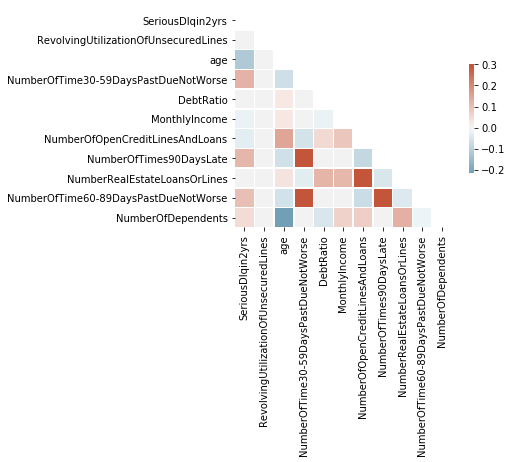

In [7]:
#Correlation Matrix
corr = train_df.corr()
import seaborn as sns
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr

Question1 : 
What are the factors that have high correlation with the probability of loan default? <br>
Answer : The factors that have high correlation with the probability of loan default(column SeriousDlqin2yrs) are columns 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate' and 'NumberOfTime60-89DaysPastDueNotWorse', which all have the absolute value of correlation above 0.1.

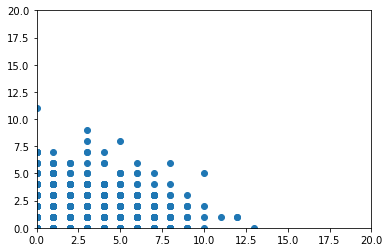

In [8]:

plt.scatter(train_df['NumberOfTime30-59DaysPastDueNotWorse'],train_df['NumberOfTime60-89DaysPastDueNotWorse'])
plt.xlim([0,20])
plt.ylim([0,20])

plt.show()

# The plot above may not show a linear trend. 
# However, the number of occurrences on each dot matters, and the correlation matrix shows that 
# The two features have a correlation of 0.98, which is extremely high.
# This means that the number of occurrences on each dot of the scatter plot is higher following a linear line
# Therefore, from the correlation, we can assume that there is an interaction effect between features 'NumberOfTime30-59DaysPastDueNotWorse' and 'NumberOfTime60-89DaysPastDueNotWorse'.


In [9]:
# Because of the strong correlation between the two features, we will use a linear model
from statsmodels.regression import linear_model

y = train_df['NumberOfTime60-89DaysPastDueNotWorse']
X = train_df['NumberOfTime30-59DaysPastDueNotWorse']
model = linear_model.OLS(y,X).fit()
model.summary()

# Here we can see that the high R-squared (>0.95)  and low P value(0.000) provides evidence that the two features have an interaction


<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     NumberOfTime60-89DaysPastDueNotWorse   R-squared (uncentered):                   0.973
Model:                                              OLS   Adj. R-squared (uncentered):              0.973
Method:                                   Least Squares   F-statistic:                          5.322e+06
Date:                                  Wed, 16 Nov 2022   Prob (F-statistic):                        0.00
Time:                                          16:02:58   Log-Likelihood:                     -1.5699e+05
No. Observations:                                150000   AIC:                                  3.140e+05
Df Residuals:                                    149999   BIC:                                  3.140e+05
Df Model:                                             1                                                  
Covariance Type:                              nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
NumberOfTime30-59DaysPastDueNotWorse     0.9741      0.000   2306.863      0.000       0.973       0.975
==============================================================================
Omnibus:                   102090.435   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3251952.699
Skew:                          -2.849   Prob(JB):                         0.00
Kurtosis:                      25.087   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Question : Are there interaction effects occurring among the variables? <br>
Answer : From the correlation matrix, we can assume that the strong correlation between feature 'NumberOfTime60-89DaysPastDueNotWorse' and 'NumberOfTime30-59DaysPastDueNotWorse' have some kind of relationship. <br>
From this assumption, I have plotted a scatter plot, but the scatter plot does not give a visualization of a linear trend because each dot has different number of occurrences. Plotting using bubble plots by occurrences did not help much either due to the large number of people not having Past Dues. <br>
So, finding the interaction using statistical methods seemed more appropriate. By using Ordinary Least Squares technique from the linear regression, it was easier to see if the two features have a strong enough interaction effect. From the model, it was clear that the two features have interaction effects since the P-value was 0.00, which is lower than 0.05. Also, the R-squared and Adjusted R-squared is high enough (>0.95) for us to not ignore the interaction effects of the two features.


Question :	Any other preliminary analysis of the given dataset? <br>
Answer : One of the important things to notice is that there is a relationship between the feature 'DebtRatio' and 'MonthlyIncome'. 'DebtRatio' is monthly payments divided by 'MontlyIncome'. From this equation, we can derive monthly payments for each person and may use it in the analysis or the model creation.

PREDICTION MODEL

In [10]:
# Import libraries for modelling
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

C:\Users\clara\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [11]:
# Create Simple ANN model
class model(nn.Module):
    def __init__(self,in_features=10, h1=8, h2=9, out_features=2):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
                
    def forward(self, x): 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x)) 
        x = self.out(x)
        return x

model = model()
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [12]:
# Split into X,y data then train-test split 
X = train_df.drop('SeriousDlqin2yrs',axis=1).values
y = train_df['SeriousDlqin2yrs'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

trainloader = DataLoader(X_train, batch_size=64, shuffle=True)
testloader = DataLoader(X_test, batch_size=64, shuffle=False)

In [13]:
# Train model on train set
epochs = 200
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)

    loss = criterion(y_pred, y_train)
    losses.append(loss)
    if i%10 == 0:
        print(f'epoch : {i}, loss :{loss.item()}') 
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

epoch : 10, loss :4.3935651779174805
epoch : 20, loss :4.412729263305664
epoch : 30, loss :2.757385730743408
epoch : 40, loss :1.3400100469589233
epoch : 50, loss :0.6864534020423889
epoch : 60, loss :0.35124367475509644
epoch : 70, loss :0.2850159704685211
epoch : 80, loss :0.2566216289997101
epoch : 90, loss :0.251407653093338
epoch : 100, loss :0.24277757108211517
epoch : 110, loss :0.23853035271167755
epoch : 120, loss :0.23457789421081543
epoch : 130, loss :0.23186776041984558
epoch : 140, loss :0.2298828512430191
epoch : 150, loss :0.2282094806432724
epoch : 160, loss :0.22662797570228577
epoch : 170, loss :0.2250239998102188
epoch : 180, loss :0.22419151663780212
epoch : 190, loss :0.23051758110523224
epoch : 200, loss :0.2979942262172699


In [14]:
# Check how many are correct in test set
num = 0
with torch.no_grad():
    y_val = model.forward(X_test)
    for i in range(len(y_test)):
        if y_val[i].argmax().item() == y_test[i]:
            num +=1

print(f'{num}/{len(y_test)} is correct : {num/len(y_test)}%')

34972/37500 is correct : 0.9325866666666667%


auc score is : 0.7105865637356178


C:\Users\clara\anaconda3\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  This is separate from the ipykernel package so we can avoid doing imports until


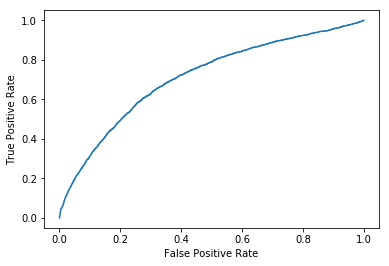

In [19]:
# for AUC evaluation

y_val_prob = F.softmax(y_val)[:,1] #probability of experiencing 90 days past due delinquency 
y_val_argmax = y_val.argmax(1)
fpr,tpr, _ = roc_curve(y_test,y_val_prob)
auc = roc_auc_score(y_test,y_val_prob)
print(f'auc score is : {auc}')

plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [16]:
# Test dataset
test_df = pd.read_csv('../credit_kaggle/GiveMeSomeCredit/cs-test.csv')
test_df = test_df.drop('Unnamed: 0',axis=1)
median_monthlyincome = test_df['MonthlyIncome'].median()
median_numofdep = test_df['NumberOfDependents'].median()
test_df['MonthlyIncome'] = test_df['MonthlyIncome'].fillna(median_monthlyincome)
test_df['NumberOfDependents'] = test_df['NumberOfDependents'].fillna(median_numofdep)

test_X = test_df.drop('SeriousDlqin2yrs',axis=1).values
test_X = torch.FloatTensor(test_X)

with torch.no_grad():
    y_test_pred = F.softmax(model.forward(test_X))[:,1]

C:\Users\clara\anaconda3\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


In [17]:
# Create output entry dataframe and output it to csv file
y_test_pred
id_col = [i+1 for i in range(len(y_test_pred))]
output_df = pd.DataFrame(id_col,columns=['Id'])
output_df['Probability'] = y_test_pred
output_df.to_csv('output.csv',index=False)

**Part 2 Questions**
Question : Tell us how you validate your model and why you chose such evaluation technique(s). <br>
Answer : First, I used the accuracy model. The accuracy model resulted in a high percentage of 93%. However, it does not take into account that the amount of people who experience 90 days past due delinquency or worse are very small compared to those who do not. This results in an imbalanced data, where the model may predict the people who do experience loan default as people who do not experience loan default. Realizing the imbalanced dataset, I later on proceded to use AUC evaluation metric.<br > <br>
Question : What is AUC? Why do you think AUC was used as the evaluation metric for this challenge? What other metrics do you think would also be suitable for this competition? <br>
AUC is area under the curve. This is used as an evaluation for imbalanced data like this data, where the number of one label is much less than the other. It takes into regard the false positive and true positive rate, which helps with evaluating the true results for people who experience 90 days past due delinquency. Some of the other metrics that could be used for imbalanced probabilistic data could be 
Cohen's Kappa.<br><br>
Question : Short explanation of what you tried. What worked and what did not work (ie. you might have tried different features/models before the final one).<br>
Answer : I have tried implementing a very simple Artificial Neural Network model on the data. Because of the lack of time(3 hours), I was not able to implement other classical machine learning models such as decision trees or other neural network models such as CNN models. I tried pruning with the learning rate. Learning rate of 0.01 seems a bit large than 0.001, but a learning rate of 0.001 converged much later and needed more epochs, which took more time for other pruning. I tried working with different numbers of hidden layers and adding more reLu functions, but this model seemed to work best with the limited time and the set number of epochs(200) that I had. <br><br>
Question : What insight(s) do you have from your model(s)?<br>
Answer : The insight I have from my model is that it does provide some accurate prediction, especially looking at the AUC graph. However, it is still quite weak because the curve is not as curved as I would like it to be. However, with different neural network models and more pruning, it does seem promising as it resulted in 71% accuracy in Kaggle.<br><br>
Question : Can you get into the top 100 of the private leaderboard or even higher? <br>
Answer : No